In [1]:
from csv import reader
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt
import math

In [2]:
def load_dataset(dataset_path,n_train_data):                     
    dataset = []
    #label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    label_dict = {'1':0,'2':1,'3':2}
    with open(dataset_path,'r')as f:
        csv_reader =reader(f,delimiter = ',')
        for row in csv_reader:
            row[0:12] = list(map(float,row[0:12]))
            row[13] = label_dict[row[13]]
            dataset.append(row)

    dataset = np.array(dataset)
    mms = MinMaxScaler()
    for i in range(dataset.shape[1]-1):
        dataset[:,i] = mms.fit_transform(dataset[:,i].reshape(-1,1)).flatten()
    #to int 
    dataset = dataset.tolist()
    data = []
    for row in dataset:
        row= list(map(float,row))
        row[13] = int(row[13])
        data.append(row)
    random.shuffle(data)

    train_data = data[0:n_train_data]
    val_data = data[n_train_data:]  

    return train_data,val_data

In [3]:
#compute neourn 
def fun_z(weights,inputs):
    #linear y = wx +b return y
    bias_term = weights[-1]
    z =0
    #print(inputs[0])
    for i in range(len(weights)-1):
        z+=weights[i]*inputs[i]
    z+=bias_term
    return z

def sigmoid(z):
    return 1.0/(1.0+math.exp(-z))

#西瓜书5.9  sigmoid 求导， bp用到
def sigmoid_derivative(output):
    return output*(1.0-output)



In [4]:
def forward_propagate(network,inputs):
    for layer in network:
        new_inputs =[]
        for neuron in layer:
            z = fun_z(neuron['weights'],inputs)
            neuron['output'] = sigmoid(z)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [5]:
def backward_propagate_error(network,actual_label):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i !=len(network)-1:
            for j in range(len(layer)):
                error =0.0
                for neuron in network[i+1]:
                    error+=(neuron['weights'][j]*neuron['delta'])
                errors.append(error)

        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(actual_label[j]-neuron['output'])
        
        #compute delta 
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] =errors[j]*sigmoid_derivative(neuron['output'])
            

In [6]:
#upgrad w and  b
def update_parameters(network,row,l_rate):
    for i in range(len(network)):
        inputs=row[:-1]
        if i != 0:
            inputs = [neuron['output']for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=l_rate*neuron['delta']*inputs[j]
            
            neuron['weights'][-1]+=l_rate*neuron['delta']


In [7]:
#network initialize
def intialize_network(n_inputs,n_hidden,n_outputs):
    #只有一个 隐藏层
    network = list()
    hidden_layer = [{'weights':[random.random()for i in range(n_inputs+1)]}for i in range(n_hidden)]
    network.append(hidden_layer)
    #output
    output_layer =[{'weights':[random.random()for i in range(n_hidden+1)]}for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [8]:
#train 
def train(train_data,l_rate,epochs,n_hidden,val_data):
    #val_data 验证集
    n_inputs = len(train_data[0])-1
    n_outputs = len(set([row[-1] for row in train_data]))
    print(n_inputs,n_inputs)
    #initialize
    network = intialize_network(n_inputs,n_hidden,n_outputs)

    acc  = []
    for epoch in range(epochs):
        for row in train_data:
            _ = forward_propagate(network,row)
            #label to compute loss
            actual_label = [0 for i in range(n_outputs)]
            actual_label[row[-1]] =1
            #backward
            backward_propagate_error(network,actual_label)
            #updata parameters
            update_parameters(network,row,l_rate)
        acc.append(validation(network,val_data))
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.plot(acc)
    plt.show()

    return network


In [9]:
#validation
def validation(network,val_data):
    predicted_label = []
    for row in val_data:
        prediction = predict(network,row)
        predicted_label.append(prediction)
    actual_label = [row[-1]for row in val_data]
    accuracy = accuracy_calculation(actual_label,predicted_label)
    return accuracy


In [10]:
def accuracy_calculation(actual_label,predicted_label):
    correct_count = 0
    for i in range(len(actual_label)):
        if actual_label[i]==predicted_label[i]:
            correct_count+=1
    return correct_count/float(len(actual_label))*100.0

def predict(network,row):
    outputs =forward_propagate(network,row)
    return outputs.index(max(outputs))

13 13


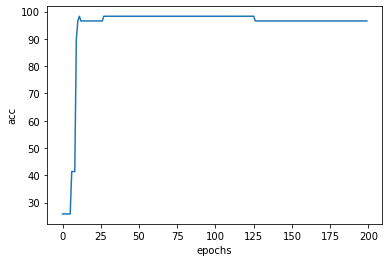

In [11]:
if __name__ =='__main__':
    file_path = './wine.csv'
    #setting
    l_rate  = 0.6
    epochs = 200
    n_hidden =15
    n_train_data = 120
    train_data,val_data = load_dataset(file_path,n_train_data)
    # for row in train_data:
    #     print(row[-1])
    #     break
    #train
    network = train(train_data,l_rate,epochs,n_hidden,val_data)